# Introduction

Welcome to the M1 Workshop session in Exploratory Data Analysis (EDA) and Unsupervised Machine Learning (UML) in `Python`.

# Application: the `Digital Nomad` dataset

In this workshop we are going to explore the nomad data using unsupervised ML techniques. This time we will focus on the city data, whichn you have not sen so far.


In [34]:
# load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)


In [35]:
# load the data
data = pd.read_csv('https://sds-aau.github.io/SDS-master/M1/data/cities.csv')

In [36]:
# Let's check out the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   place                   780 non-null    object 
 1   alpha-2                 780 non-null    object 
 2   region                  780 non-null    object 
 3   sub-region              780 non-null    object 
 4   cost_nomad              780 non-null    float64
 5   cost_coworking          780 non-null    float64
 6   cost_expat              780 non-null    float64
 7   coffee_in_cafe          780 non-null    float64
 8   cost_beer               780 non-null    float64
 9   places_to_work          780 non-null    float64
 10  free_wifi_available     780 non-null    float64
 11  internet_speed          780 non-null    float64
 12  freedom_score           780 non-null    float64
 13  peace_score             780 non-null    float64
 14  safety                  780 non-null    fl

In [37]:
data.head()

,place,alpha-2,region,sub-region,cost_nomad,cost_coworking,cost_expat,coffee_in_cafe,cost_beer,places_to_work,free_wifi_available,internet_speed,freedom_score,peace_score,safety,fragile_states_index,press_freedom_index,female_friendly,lgbt_friendly,friendly_to_foreigners,racism,leisure,life_score,nightlife,weed
0,Budapest,HU,Europe,Eastern Europe,1364.0,152.41,1273.0,1.73,1.73,1.0,0.4,31.0,0.6,0.8,0.60,52.7,28.17,1.0,0.27,0.6,0.40,0.80,0.86,1.00,0.0
1,Chiang Mai,TH,Asia,South-eastern Asia,777.0,98.88,780.0,0.85,0.85,0.8,0.6,14.0,0.2,0.4,0.80,78.8,44.53,0.8,0.60,0.6,0.40,0.62,0.75,0.40,0.0
2,Phuket,TH,Asia,South-eastern Asia,1012.0,155.43,1714.0,1.41,1.41,0.8,0.4,14.0,0.2,0.4,0.80,78.8,44.53,0.6,0.80,0.6,0.42,0.60,0.75,0.82,0.0
3,Bangkok,TH,Asia,South-eastern Asia,1197.0,131.41,1158.0,2.12,2.12,1.0,1.0,24.0,0.2,0.4,0.77,78.8,44.53,0.8,0.80,1.0,0.42,0.82,0.72,1.00,0.0
4,Ko Samui,TH,Asia,South-eastern Asia,1352.0,169.56,1347.0,1.41,1.41,0.8,0.4,15.0,0.2,0.4,0.80,78.8,44.53,0.8,0.80,1.0,0.40,0.80,0.80,0.80,0.0


In [38]:
data['region'].value_counts()

Asia        262
Europe      235
Americas    221
Africa       45
Oceania      17
Name: region, dtype: int64

In [39]:
# We load up Standard Scaler from sklearn

from sklearn.preprocessing import StandardScaler
X = data.loc[:,'cost_nomad':'cost_expat']
X = np.nan_to_num(X)
scaled_data = StandardScaler().fit_transform(X)
scaled_data

array([[-0.86606693, -0.33259749, -0.48043563],
       [-1.39139058, -0.64031187, -0.87005443],
       [-1.18108213, -0.31523718, -0.13191252],
       ...,
       [ 0.17294628, -0.0501188 , -0.57922336],
       [-1.0468427 ,  0.03139419, -0.63375418],
       [ 2.3959513 ,  0.86072267, -0.34766492]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

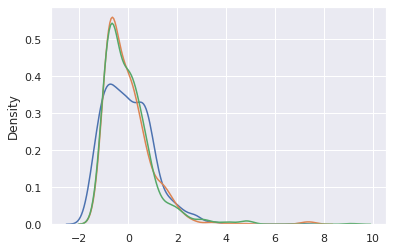

In [40]:
# all variables now have a mean of 0 and std of 1
for i in range(3):
  sns.distplot(scaled_data[:,i], hist=False)

In [41]:
# Let's import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # we explicitly ask for 2 components

In [42]:
# And now we use PCA to transform the data
pca_data = pca.fit_transform(scaled_data)

In [43]:
pca_data.shape # 780 rows, 2 columns - just as we wanted

(780, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


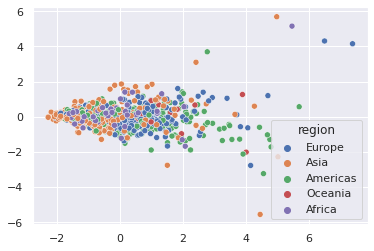

In [44]:
sns.scatterplot(pca_data[:,0], pca_data[:,1], hue = data['region'] )

## Clustering

Now that we had a look at dimensionality reduction, let's see what clustering can do at the present case.

We will try out **K-means** and **hierarchical clustering**

In [45]:
# we import kmeans
from sklearn.cluster import KMeans

In [46]:
# and instantiate it where we need to specify that we want it to create 3 clusters

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(scaled_data)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 2
 1 1 1 1 2 0 1 1 1 1 1 1 1 2 1 2 1 1 0 1 1 1 1 2 1 1 2 1 1 2 1 2 2 1 2 1 1
 1 1 2 2 2 2 2 1 2 2 0 1 1 1 0 1 1 2 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 2 1 1 1 1 1 0 0 1 0 1 1
 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 2 1 1 1 2 1 1 2 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 1 2 2 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 0 0 2 0 1 0 1 1 2 1 2 0 1 0 0 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 2 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


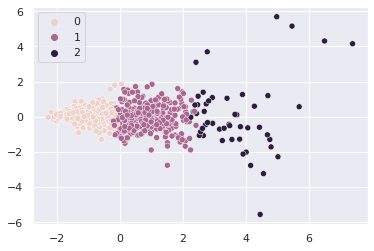

In [47]:
# now let's see how well the clusters fit with the places

sns.scatterplot(pca_data[:,0], pca_data[:, 1], hue = k_means.labels_)

In [48]:
# we can check out a cross-tab with clusters vs. regions
pd.crosstab(k_means.labels_, data['region'])

region,Africa,Americas,Asia,Europe,Oceania
row_0,,,,,
0,26,82,214,96,0
1,18,115,40,125,14
2,1,24,8,14,3


Now let's turn to hierarchical clustering - the procedure is the same, we just need to swap the algorithm name


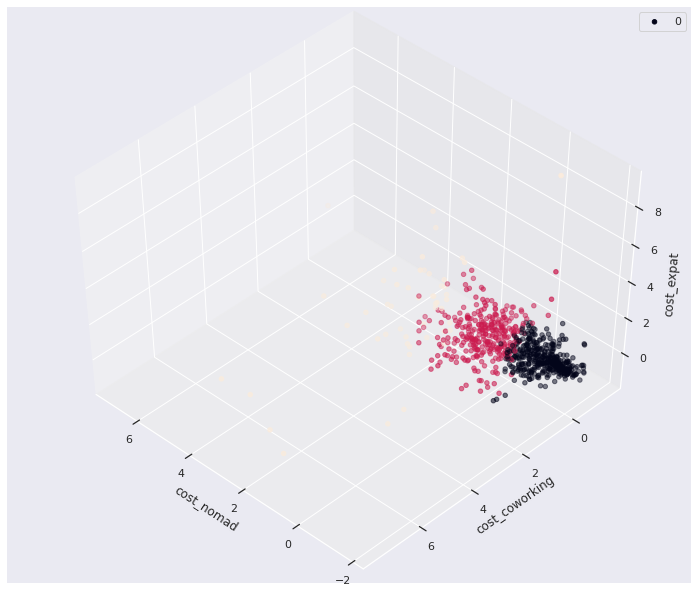

In [50]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('cost_nomad')
ax.set_ylabel('cost_coworking')
ax.set_zlabel('cost_expat')

ax.scatter(scaled_data[:,0], scaled_data[:, 1], scaled_data[:, 2], c= labels.astype(np.float))
plt.legend(labels)